# Expectation and Variance: A Deep Dive

## Table of Contents
1. [Introduction to Expectation](#intro-expectation)
2. [Expected Value: Theory and Computation](#expected-value)
3. [Properties of Expectation](#properties-expectation)
4. [Variance and Standard Deviation](#variance)
5. [Properties of Variance](#properties-variance)
6. [Covariance and Correlation](#covariance)
7. [Moments and Moment Generating Functions](#moments)
8. [Conditional Expectation](#conditional-expectation)
9. [Law of Large Numbers](#lln)
10. [Chebyshev's Inequality](#chebyshev)
11. [Jensen's Inequality](#jensen)
12. [Applications in Statistics and ML](#applications)
13. [Portfolio Theory](#portfolio)
14. [Advanced Topics](#advanced)

---

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Libraries imported successfully!
NumPy version: 2.0.2
Matplotlib version: 3.10.0


## 1. Introduction to Expectation <a name="intro-expectation"></a>

### What is Expected Value?

The **expected value** (or **expectation** or **mean**) is the long-run average value of a random variable. It's the "center" of the distribution.

### Intuition

Imagine rolling a die thousands of times and averaging the results. The expected value tells you what that average will converge to.

### Mathematical Definition

**For discrete random variables:**
$$E[X] = \sum_{x} x \cdot P(X = x)$$

**For continuous random variables:**
$$E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx$$

where $f(x)$ is the probability density function (PDF).

### Notation

- $E[X]$: Expected value of $X$
- $\mu$ or $\mu_X$: Often used to denote the mean
- $\mathbb{E}[X]$: Alternative notation

### Why is it Important?

1. **Central tendency**: Describes the "typical" value
2. **Decision making**: Expected payoff in games, investments
3. **Prediction**: Average outcome of random processes
4. **Statistics**: Foundation for parameter estimation
5. **Machine learning**: Loss functions, gradient descent

---

## 2. Expected Value: Theory and Computation <a name="expected-value"></a>

### Example 1: Fair Die

For a fair six-sided die:
$$E[X] = 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + 3 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 6 \cdot \frac{1}{6}$$
$$E[X] = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = \frac{21}{6} = 3.5$$

In [2]:
# Theoretical calculation for a die
print("="*70)
print("EXPECTED VALUE OF A FAIR DIE")
print("="*70)

# Theoretical
outcomes = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

theoretical_mean = np.sum(outcomes * probabilities)

print("\nTheoretical Calculation:")
print(f"E[X] = Σ x · P(X=x)")
for outcome, prob in zip(outcomes, probabilities):
    print(f"     + {outcome} × {prob:.4f} = {outcome * prob:.4f}")
print(f"     = {theoretical_mean:.4f}")

# Empirical verification through simulation
n_rolls = 1000000
rolls = np.random.randint(1, 7, n_rolls)
empirical_mean = np.mean(rolls)

print("\n" + "-"*70)
print("Empirical Verification (Simulation):")
print("-"*70)
print(f"Number of rolls: {n_rolls:,}")
print(f"Empirical mean: {empirical_mean:.6f}")
print(f"Theoretical mean: {theoretical_mean:.6f}")
print(f"Difference: {abs(empirical_mean - theoretical_mean):.6f}")

# Show convergence
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]
convergence = []

print("\n" + "-"*70)
print("Convergence to Expected Value:")
print("-"*70)
print("Sample Size | Empirical Mean | Error from True Mean")
print("-"*70)

for n in sample_sizes:
    sample = np.random.randint(1, 7, n)
    sample_mean = np.mean(sample)
    convergence.append(sample_mean)
    error = abs(sample_mean - theoretical_mean)
    print(f"{n:11,} | {sample_mean:14.6f} | {error:20.6f}")

EXPECTED VALUE OF A FAIR DIE

Theoretical Calculation:
E[X] = Σ x · P(X=x)
     + 1 × 0.1667 = 0.1667
     + 2 × 0.1667 = 0.3333
     + 3 × 0.1667 = 0.5000
     + 4 × 0.1667 = 0.6667
     + 5 × 0.1667 = 0.8333
     + 6 × 0.1667 = 1.0000
     = 3.5000

----------------------------------------------------------------------
Empirical Verification (Simulation):
----------------------------------------------------------------------
Number of rolls: 1,000,000
Empirical mean: 3.500194
Theoretical mean: 3.500000
Difference: 0.000194

----------------------------------------------------------------------
Convergence to Expected Value:
----------------------------------------------------------------------
Sample Size | Empirical Mean | Error from True Mean
----------------------------------------------------------------------
         10 |       4.500000 |             1.000000
        100 |       3.630000 |             0.130000
      1,000 |       3.531000 |             0.031000
     10,000 |   

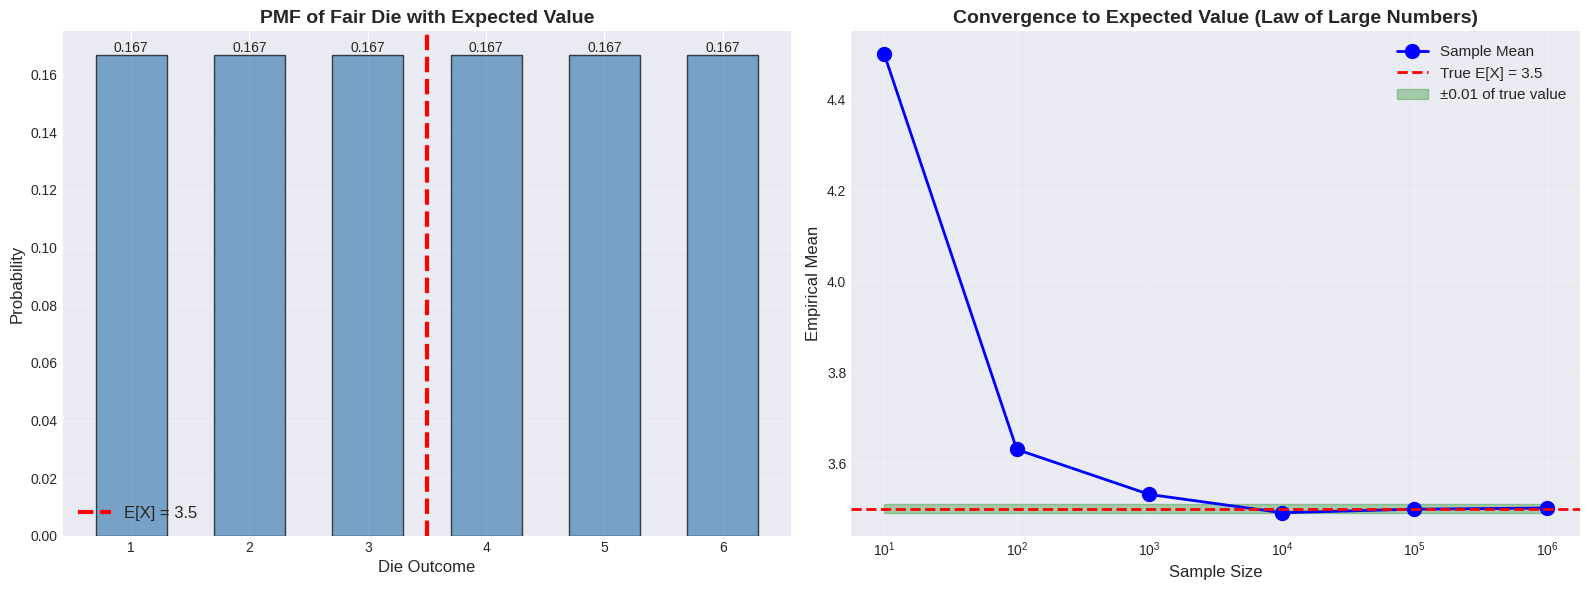

In [3]:
# Visualize expected value and convergence
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PMF with expected value marked
ax = axes[0]
bars = ax.bar(outcomes, probabilities, alpha=0.7, color='steelblue', edgecolor='black', width=0.6)
ax.axvline(theoretical_mean, color='red', linestyle='--', linewidth=3, 
          label=f'E[X] = {theoretical_mean}')

# Add value labels on bars
for bar, outcome, prob in zip(bars, outcomes, probabilities):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{prob:.3f}',
           ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Die Outcome', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('PMF of Fair Die with Expected Value', fontsize=14, fontweight='bold')
ax.set_xticks(outcomes)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

# Convergence plot
ax = axes[1]
ax.semilogx(sample_sizes, convergence, 'bo-', linewidth=2, markersize=10, label='Sample Mean')
ax.axhline(theoretical_mean, color='red', linestyle='--', linewidth=2, 
          label=f'True E[X] = {theoretical_mean}')
ax.fill_between(sample_sizes, theoretical_mean - 0.01, theoretical_mean + 0.01, 
               alpha=0.3, color='green', label='±0.01 of true value')
ax.set_xlabel('Sample Size', fontsize=12)
ax.set_ylabel('Empirical Mean', fontsize=12)
ax.set_title('Convergence to Expected Value (Law of Large Numbers)', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Example 2: Continuous Random Variable

For a uniform distribution $U(a, b)$:
$$E[X] = \int_a^b x \cdot \frac{1}{b-a} dx = \frac{1}{b-a} \cdot \frac{x^2}{2}\Big|_a^b = \frac{a+b}{2}$$

In [4]:
# Expected value of continuous distributions
print("="*70)
print("EXPECTED VALUE OF CONTINUOUS DISTRIBUTIONS")
print("="*70)

# Uniform distribution U(0, 10)
a, b = 0, 10
theoretical_uniform = (a + b) / 2

n_samples = 1000000
uniform_samples = np.random.uniform(a, b, n_samples)
empirical_uniform = np.mean(uniform_samples)

print(f"\n1. Uniform Distribution U({a}, {b}):")
print(f"   Theoretical E[X] = (a+b)/2 = {theoretical_uniform:.6f}")
print(f"   Empirical E[X] = {empirical_uniform:.6f}")
print(f"   Difference: {abs(empirical_uniform - theoretical_uniform):.6f}")

# Exponential distribution
lambda_param = 2
theoretical_exp = 1 / lambda_param

exp_samples = np.random.exponential(1/lambda_param, n_samples)
empirical_exp = np.mean(exp_samples)

print(f"\n2. Exponential Distribution (λ={lambda_param}):")
print(f"   Theoretical E[X] = 1/λ = {theoretical_exp:.6f}")
print(f"   Empirical E[X] = {empirical_exp:.6f}")
print(f"   Difference: {abs(empirical_exp - theoretical_exp):.6f}")

# Normal distribution
mu, sigma = 5, 2
theoretical_normal = mu

normal_samples = np.random.normal(mu, sigma, n_samples)
empirical_normal = np.mean(normal_samples)

print(f"\n3. Normal Distribution N({mu}, {sigma}²):")
print(f"   Theoretical E[X] = μ = {theoretical_normal:.6f}")
print(f"   Empirical E[X] = {empirical_normal:.6f}")
print(f"   Difference: {abs(empirical_normal - theoretical_normal):.6f}")

EXPECTED VALUE OF CONTINUOUS DISTRIBUTIONS

1. Uniform Distribution U(0, 10):
   Theoretical E[X] = (a+b)/2 = 5.000000
   Empirical E[X] = 4.996962
   Difference: 0.003038

2. Exponential Distribution (λ=2):
   Theoretical E[X] = 1/λ = 0.500000
   Empirical E[X] = 0.500394
   Difference: 0.000394

3. Normal Distribution N(5, 2²):
   Theoretical E[X] = μ = 5.000000
   Empirical E[X] = 4.999043
   Difference: 0.000957


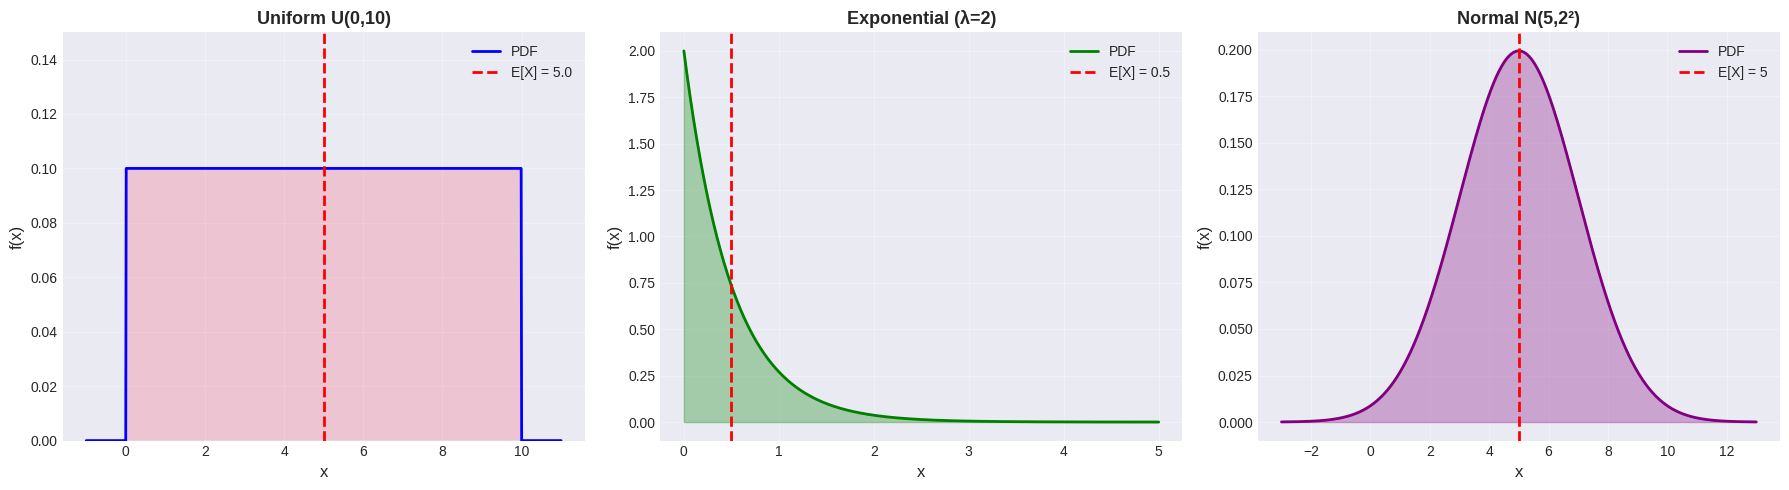

In [5]:
# Visualize continuous distributions with expected values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Uniform
ax = axes[0]
x_uniform = np.linspace(a-1, b+1, 1000)
pdf_uniform = np.where((x_uniform >= a) & (x_uniform <= b), 1/(b-a), 0)
ax.plot(x_uniform, pdf_uniform, 'b-', linewidth=2, label='PDF')
ax.fill_between(x_uniform, pdf_uniform, alpha=0.3)
ax.axvline(theoretical_uniform, color='red', linestyle='--', linewidth=2, 
          label=f'E[X] = {theoretical_uniform}')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title(f'Uniform U({a},{b})', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 0.15)

# Exponential
ax = axes[1]
x_exp = np.linspace(0, 5, 1000)
pdf_exp = stats.expon.pdf(x_exp, scale=1/lambda_param)
ax.plot(x_exp, pdf_exp, 'g-', linewidth=2, label='PDF')
ax.fill_between(x_exp, pdf_exp, alpha=0.3, color='green')
ax.axvline(theoretical_exp, color='red', linestyle='--', linewidth=2, 
          label=f'E[X] = {theoretical_exp}')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title(f'Exponential (λ={lambda_param})', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Normal
ax = axes[2]
x_normal = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
pdf_normal = stats.norm.pdf(x_normal, mu, sigma)
ax.plot(x_normal, pdf_normal, 'purple', linewidth=2, label='PDF')
ax.fill_between(x_normal, pdf_normal, alpha=0.3, color='purple')
ax.axvline(theoretical_normal, color='red', linestyle='--', linewidth=2, 
          label=f'E[X] = {theoretical_normal}')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title(f'Normal N({mu},{sigma}²)', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Properties of Expectation <a name="properties-expectation"></a>

### Key Properties

1. **Linearity**: $E[aX + b] = aE[X] + b$
2. **Additivity**: $E[X + Y] = E[X] + E[Y]$ (always holds, even if not independent)
3. **Constant**: $E[c] = c$ for any constant $c$
4. **Product** (independent): $E[XY] = E[X]E[Y]$ (only if $X$ and $Y$ are independent)
5. **Function of RV**: $E[g(X)] = \sum_x g(x) P(X=x)$ or $\int g(x) f(x) dx$

### Law of the Unconscious Statistician (LOTUS)

For a function $g(X)$:
$$E[g(X)] = \sum_x g(x) \cdot P(X=x) \quad \text{or} \quad \int_{-\infty}^{\infty} g(x) \cdot f(x) dx$$

We don't need to find the distribution of $g(X)$ first!

In [6]:
# Demonstrate properties of expectation
print("="*70)
print("PROPERTIES OF EXPECTATION")
print("="*70)

n_samples = 100000
X = np.random.randint(1, 7, n_samples)  # Die roll
Y = np.random.randint(1, 7, n_samples)  # Another independent die roll

E_X = np.mean(X)
E_Y = np.mean(Y)

print("\nBase random variables:")
print(f"X: Die roll, E[X] = {E_X:.4f}")
print(f"Y: Die roll, E[Y] = {E_Y:.4f}")

# Property 1: Linearity
print("\n" + "-"*70)
print("Property 1: Linearity E[aX + b] = aE[X] + b")
print("-"*70)
a, b = 3, 5
Z = a * X + b
E_Z_empirical = np.mean(Z)
E_Z_formula = a * E_X + b

print(f"Let Z = {a}X + {b}")
print(f"E[Z] (empirical) = {E_Z_empirical:.4f}")
print(f"E[Z] (formula)   = {a} × {E_X:.4f} + {b} = {E_Z_formula:.4f}")
print(f"Difference: {abs(E_Z_empirical - E_Z_formula):.6f} ✓")

# Property 2: Additivity
print("\n" + "-"*70)
print("Property 2: Additivity E[X + Y] = E[X] + E[Y]")
print("-"*70)
W = X + Y
E_W_empirical = np.mean(W)
E_W_formula = E_X + E_Y

print(f"Let W = X + Y (sum of two dice)")
print(f"E[W] (empirical) = {E_W_empirical:.4f}")
print(f"E[W] (formula)   = {E_X:.4f} + {E_Y:.4f} = {E_W_formula:.4f}")
print(f"Difference: {abs(E_W_empirical - E_W_formula):.6f} ✓")

# Property 3: Product (for independent variables)
print("\n" + "-"*70)
print("Property 3: E[XY] = E[X]E[Y] (for independent X, Y)")
print("-"*70)
XY = X * Y
E_XY_empirical = np.mean(XY)
E_XY_formula = E_X * E_Y

print(f"E[XY] (empirical) = {E_XY_empirical:.4f}")
print(f"E[X]E[Y] (formula) = {E_X:.4f} × {E_Y:.4f} = {E_XY_formula:.4f}")
print(f"Difference: {abs(E_XY_empirical - E_XY_formula):.6f} ✓")

# LOTUS: E[g(X)] for g(X) = X²
print("\n" + "-"*70)
print("LOTUS: E[g(X)] where g(X) = X²")
print("-"*70)
X_squared = X**2
E_X_squared = np.mean(X_squared)

# Theoretical for die: E[X²] = (1² + 2² + ... + 6²)/6
theoretical_E_X_squared = sum([i**2 for i in range(1, 7)]) / 6

print(f"E[X²] (empirical) = {E_X_squared:.4f}")
print(f"E[X²] (theoretical) = {theoretical_E_X_squared:.4f}")
print(f"Difference: {abs(E_X_squared - theoretical_E_X_squared):.6f} ✓")
print(f"\nNote: E[X²] ≠ (E[X])² = {E_X**2:.4f}")

PROPERTIES OF EXPECTATION

Base random variables:
X: Die roll, E[X] = 3.5007
Y: Die roll, E[Y] = 3.4977

----------------------------------------------------------------------
Property 1: Linearity E[aX + b] = aE[X] + b
----------------------------------------------------------------------
Let Z = 3X + 5
E[Z] (empirical) = 15.5022
E[Z] (formula)   = 3 × 3.5007 + 5 = 15.5022
Difference: 0.000000 ✓

----------------------------------------------------------------------
Property 2: Additivity E[X + Y] = E[X] + E[Y]
----------------------------------------------------------------------
Let W = X + Y (sum of two dice)
E[W] (empirical) = 6.9985
E[W] (formula)   = 3.5007 + 3.4977 = 6.9985
Difference: 0.000000 ✓

----------------------------------------------------------------------
Property 3: E[XY] = E[X]E[Y] (for independent X, Y)
----------------------------------------------------------------------
E[XY] (empirical) = 12.2451
E[X]E[Y] (formula) = 3.5007 × 3.4977 = 12.2447
Difference: 0.00

## 4. Variance and Standard Deviation <a name="variance"></a>

### What is Variance?

**Variance** measures the spread or dispersion of a random variable around its mean.

### Mathematical Definition

$$\text{Var}(X) = E[(X - E[X])^2] = E[X^2] - (E[X])^2$$

### Standard Deviation

$$\sigma = \sqrt{\text{Var}(X)}$$

Standard deviation is in the same units as $X$, making it more interpretable.

### Why Two Formulas?

1. **Definition**: $E[(X - E[X])^2]$ — average squared deviation from mean
2. **Computational**: $E[X^2] - (E[X])^2$ — often easier to calculate

### Proof of Equivalence

$$\text{Var}(X) = E[(X - \mu)^2]$$
$$= E[X^2 - 2X\mu + \mu^2]$$
$$= E[X^2] - 2\mu E[X] + \mu^2$$
$$= E[X^2] - 2\mu^2 + \mu^2$$
$$= E[X^2] - \mu^2 = E[X^2] - (E[X])^2$$

In [7]:
# Variance calculation for a die
print("="*70)
print("VARIANCE AND STANDARD DEVIATION")
print("="*70)

n_samples = 1000000
die_rolls = np.random.randint(1, 7, n_samples)

# Calculate using both formulas
mean = np.mean(die_rolls)

# Method 1: Definition
variance_def = np.mean((die_rolls - mean)**2)

# Method 2: Computational formula
E_X_squared = np.mean(die_rolls**2)
variance_comp = E_X_squared - mean**2

# NumPy's variance
variance_numpy = np.var(die_rolls)

# Standard deviation
std_dev = np.std(die_rolls)

print("\nFor a fair die:")
print(f"Mean: {mean:.6f}")
print("\nVariance calculations:")
print(f"Method 1 (definition):    Var(X) = E[(X-μ)²] = {variance_def:.6f}")
print(f"Method 2 (computational): Var(X) = E[X²] - (E[X])² = {variance_comp:.6f}")
print(f"NumPy:                    Var(X) = {variance_numpy:.6f}")
print(f"\nStandard Deviation: σ = √Var(X) = {std_dev:.6f}")

# Theoretical values
theoretical_mean = 3.5
theoretical_var = sum([(i - theoretical_mean)**2 / 6 for i in range(1, 7)])
theoretical_std = np.sqrt(theoretical_var)

print("\n" + "-"*70)
print("Comparison with theoretical values:")
print("-"*70)
print(f"Theoretical mean: {theoretical_mean:.6f}")
print(f"Theoretical variance: {theoretical_var:.6f}")
print(f"Theoretical std dev: {theoretical_std:.6f}")
print(f"\nError in mean: {abs(mean - theoretical_mean):.6f}")
print(f"Error in variance: {abs(variance_numpy - theoretical_var):.6f}")
print(f"Error in std dev: {abs(std_dev - theoretical_std):.6f}")

VARIANCE AND STANDARD DEVIATION

For a fair die:
Mean: 3.500016

Variance calculations:
Method 1 (definition):    Var(X) = E[(X-μ)²] = 2.917530
Method 2 (computational): Var(X) = E[X²] - (E[X])² = 2.917530
NumPy:                    Var(X) = 2.917530

Standard Deviation: σ = √Var(X) = 1.708078

----------------------------------------------------------------------
Comparison with theoretical values:
----------------------------------------------------------------------
Theoretical mean: 3.500000
Theoretical variance: 2.916667
Theoretical std dev: 1.707825

Error in mean: 0.000016
Error in variance: 0.000863
Error in std dev: 0.000253


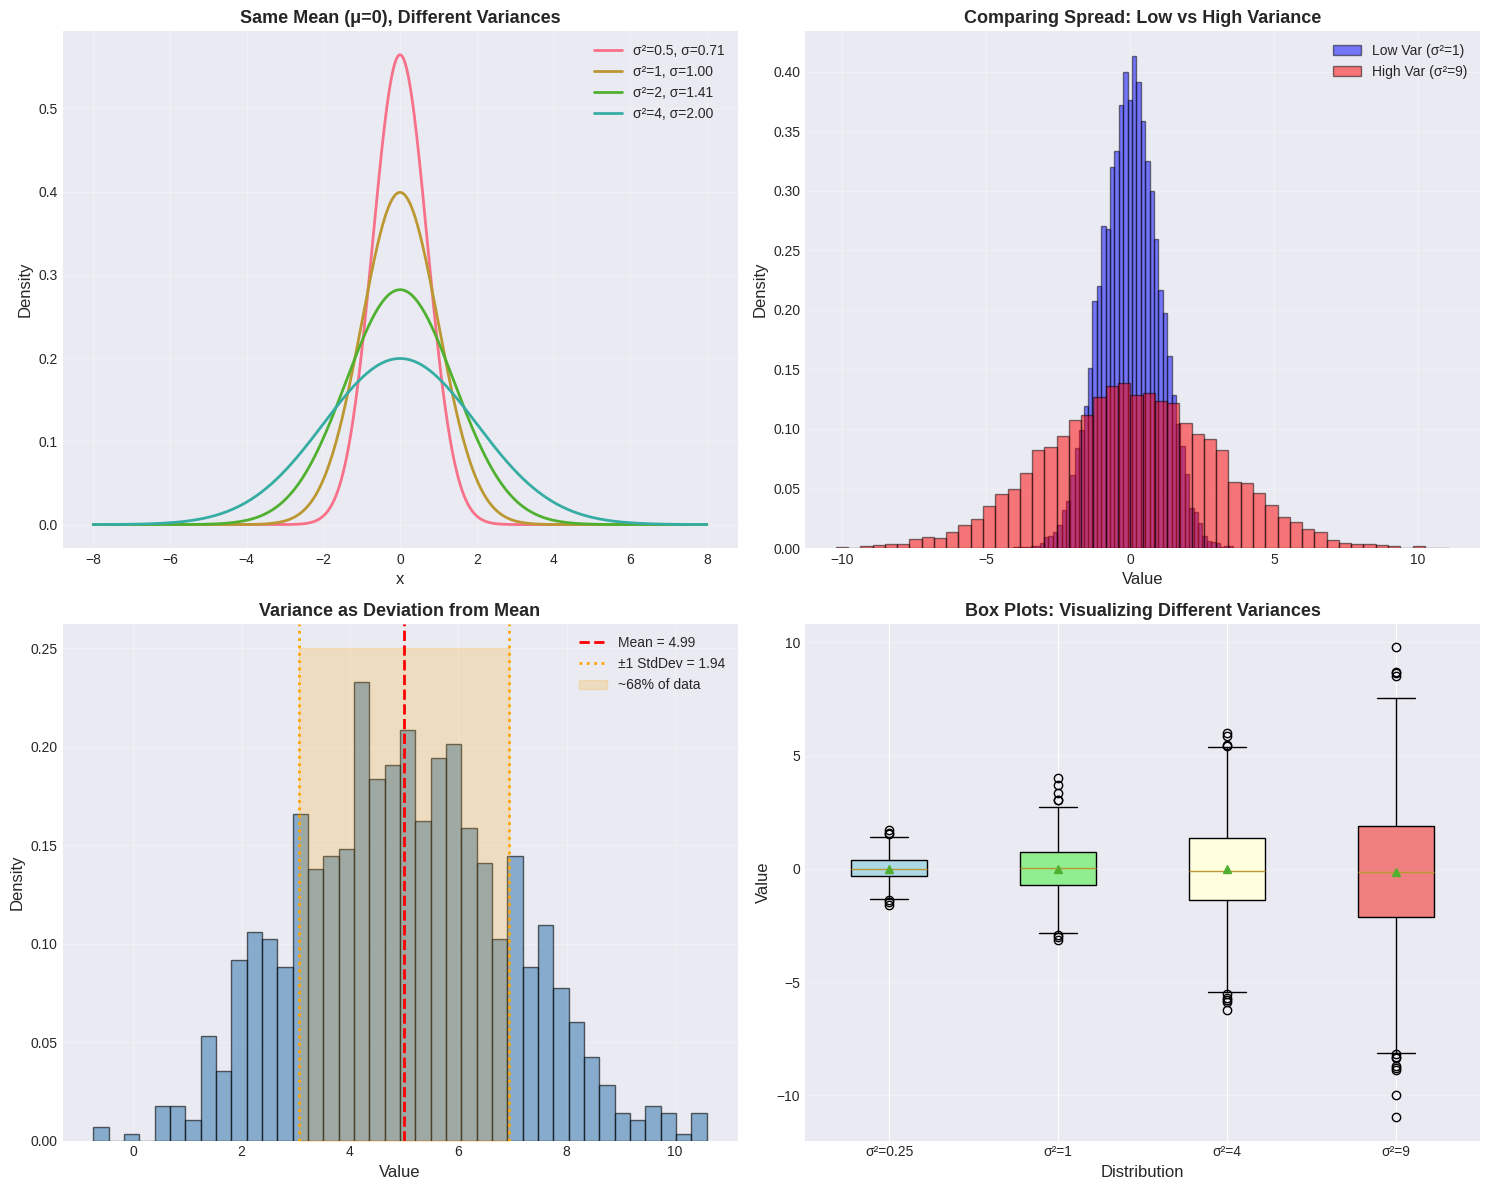

In [8]:
# Visualize distributions with different variances
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Same mean, different variance
ax = axes[0, 0]
mean = 0
variances = [0.5, 1, 2, 4]
x = np.linspace(-8, 8, 1000)

for var in variances:
    std = np.sqrt(var)
    pdf = stats.norm.pdf(x, mean, std)
    ax.plot(x, pdf, linewidth=2, label=f'σ²={var}, σ={std:.2f}')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Same Mean (μ=0), Different Variances', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Histogram showing spread
ax = axes[0, 1]
n_samples = 10000
low_var_samples = np.random.normal(0, 1, n_samples)
high_var_samples = np.random.normal(0, 3, n_samples)

ax.hist(low_var_samples, bins=50, alpha=0.5, color='blue', 
       label=f'Low Var (σ²=1)', density=True, edgecolor='black')
ax.hist(high_var_samples, bins=50, alpha=0.5, color='red', 
       label=f'High Var (σ²=9)', density=True, edgecolor='black')
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Comparing Spread: Low vs High Variance', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Deviation from mean visualization
ax = axes[1, 0]
sample_data = np.random.normal(5, 2, 1000)
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data)

ax.hist(sample_data, bins=40, alpha=0.6, color='steelblue', edgecolor='black', density=True)
ax.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {sample_mean:.2f}')
ax.axvline(sample_mean - sample_std, color='orange', linestyle=':', linewidth=2)
ax.axvline(sample_mean + sample_std, color='orange', linestyle=':', linewidth=2, 
          label=f'±1 StdDev = {sample_std:.2f}')
ax.fill_betweenx([0, 0.25], sample_mean - sample_std, sample_mean + sample_std,
                 alpha=0.2, color='orange', label='~68% of data')
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Variance as Deviation from Mean', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Box plots showing variance
ax = axes[1, 1]
data_sets = [
    np.random.normal(0, 0.5, 1000),
    np.random.normal(0, 1, 1000),
    np.random.normal(0, 2, 1000),
    np.random.normal(0, 3, 1000)
]
labels = ['σ²=0.25', 'σ²=1', 'σ²=4', 'σ²=9']

bp = ax.boxplot(data_sets, labels=labels, patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']):
    patch.set_facecolor(color)

ax.set_xlabel('Distribution', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Box Plots: Visualizing Different Variances', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 5. Properties of Variance <a name="properties-variance"></a>

### Key Properties

1. **Constant**: $\text{Var}(c) = 0$ for any constant $c$
2. **Scaling**: $\text{Var}(aX) = a^2 \text{Var}(X)$
3. **Shift invariance**: $\text{Var}(X + b) = \text{Var}(X)$
4. **Combined**: $\text{Var}(aX + b) = a^2 \text{Var}(X)$
5. **Sum (independent)**: $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)$ if $X \perp Y$
6. **Sum (general)**: $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X,Y)$

### Important Notes

- Variance is always non-negative: $\text{Var}(X) \geq 0$
- $\text{Var}(X) = 0$ if and only if $X$ is constant (no randomness)
- Unlike expectation, variance is NOT linear!

In [9]:
# Demonstrate properties of variance
print("="*70)
print("PROPERTIES OF VARIANCE")
print("="*70)

n_samples = 100000
X = np.random.normal(5, 2, n_samples)  # N(5, 4)
Y = np.random.normal(3, 1.5, n_samples)  # N(3, 2.25), independent

var_X = np.var(X)
var_Y = np.var(Y)

print(f"\nBase random variables:")
print(f"X ~ N(5, 4), Var(X) = {var_X:.4f}")
print(f"Y ~ N(3, 2.25), Var(Y) = {var_Y:.4f}")

# Property 1: Constant has zero variance
print("\n" + "-"*70)
print("Property 1: Var(c) = 0")
print("-"*70)
c = 10
constant = np.full(n_samples, c)
var_constant = np.var(constant)
print(f"Var({c}) = {var_constant:.10f} ≈ 0 ✓")

# Property 2: Scaling
print("\n" + "-"*70)
print("Property 2: Var(aX) = a² Var(X)")
print("-"*70)
a = 3
aX = a * X
var_aX_empirical = np.var(aX)
var_aX_formula = a**2 * var_X

print(f"Let Z = {a}X")
print(f"Var(Z) (empirical) = {var_aX_empirical:.4f}")
print(f"Var(Z) (formula)   = {a}² × {var_X:.4f} = {var_aX_formula:.4f}")
print(f"Difference: {abs(var_aX_empirical - var_aX_formula):.6f} ✓")

# Property 3: Shift invariance
print("\n" + "-"*70)
print("Property 3: Var(X + b) = Var(X)")
print("-"*70)
b = 100
X_plus_b = X + b
var_X_plus_b = np.var(X_plus_b)

print(f"Var(X) = {var_X:.4f}")
print(f"Var(X + {b}) = {var_X_plus_b:.4f}")
print(f"Difference: {abs(var_X - var_X_plus_b):.6f} ✓")
print("(Adding a constant shifts the distribution but doesn't change spread)")

# Property 4: Combined
print("\n" + "-"*70)
print("Property 4: Var(aX + b) = a² Var(X)")
print("-"*70)
a, b = 2, 50
aX_plus_b = a * X + b
var_aX_plus_b_empirical = np.var(aX_plus_b)
var_aX_plus_b_formula = a**2 * var_X

print(f"Let W = {a}X + {b}")
print(f"Var(W) (empirical) = {var_aX_plus_b_empirical:.4f}")
print(f"Var(W) (formula)   = {a}² × {var_X:.4f} = {var_aX_plus_b_formula:.4f}")
print(f"Difference: {abs(var_aX_plus_b_empirical - var_aX_plus_b_formula):.6f} ✓")

# Property 5: Sum of independent variables
print("\n" + "-"*70)
print("Property 5: Var(X + Y) = Var(X) + Var(Y) for independent X, Y")
print("-"*70)
X_plus_Y = X + Y
var_X_plus_Y_empirical = np.var(X_plus_Y)
var_X_plus_Y_formula = var_X + var_Y

print(f"Var(X + Y) (empirical) = {var_X_plus_Y_empirical:.4f}")
print(f"Var(X) + Var(Y) = {var_X:.4f} + {var_Y:.4f} = {var_X_plus_Y_formula:.4f}")
print(f"Difference: {abs(var_X_plus_Y_empirical - var_X_plus_Y_formula):.6f} ✓")

# Contrast: Var(X + Y) ≠ Var(X) + Var(Y) when dependent
print("\n" + "-"*70)
print("Counter-example: Dependent variables")
print("-"*70)
X_dep = np.random.normal(0, 1, n_samples)
Y_dep = X_dep + np.random.normal(0, 0.5, n_samples)  # Y depends on X

var_X_dep = np.var(X_dep)
var_Y_dep = np.var(Y_dep)
var_sum_dep = np.var(X_dep + Y_dep)

print(f"When Y is dependent on X:")
print(f"Var(X) = {var_X_dep:.4f}")
print(f"Var(Y) = {var_Y_dep:.4f}")
print(f"Var(X + Y) = {var_sum_dep:.4f}")
print(f"Var(X) + Var(Y) = {var_X_dep + var_Y_dep:.4f}")
print(f"\nVar(X + Y) ≠ Var(X) + Var(Y) because X and Y are dependent!")

PROPERTIES OF VARIANCE

Base random variables:
X ~ N(5, 4), Var(X) = 4.0054
Y ~ N(3, 2.25), Var(Y) = 2.2704

----------------------------------------------------------------------
Property 1: Var(c) = 0
----------------------------------------------------------------------
Var(10) = 0.0000000000 ≈ 0 ✓

----------------------------------------------------------------------
Property 2: Var(aX) = a² Var(X)
----------------------------------------------------------------------
Let Z = 3X
Var(Z) (empirical) = 36.0487
Var(Z) (formula)   = 3² × 4.0054 = 36.0487
Difference: 0.000000 ✓

----------------------------------------------------------------------
Property 3: Var(X + b) = Var(X)
----------------------------------------------------------------------
Var(X) = 4.0054
Var(X + 100) = 4.0054
Difference: 0.000000 ✓
(Adding a constant shifts the distribution but doesn't change spread)

----------------------------------------------------------------------
Property 4: Var(aX + b) = a² Var(X)
--

## 6. Covariance and Correlation <a name="covariance"></a>

### Covariance

**Covariance** measures how two random variables vary together.

$$\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]$$

### Interpretation

- $\text{Cov}(X, Y) > 0$: $X$ and $Y$ tend to increase together (positive relationship)
- $\text{Cov}(X, Y) < 0$: When $X$ increases, $Y$ tends to decrease (negative relationship)
- $\text{Cov}(X, Y) = 0$: No linear relationship (but may have nonlinear relationship!)

### Correlation

**Correlation** is normalized covariance:

$$\rho(X, Y) = \text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X) \text{Var}(Y)}} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$$

### Properties of Correlation

- Always between -1 and 1: $-1 \leq \rho \leq 1$
- $\rho = 1$: Perfect positive linear relationship
- $\rho = -1$: Perfect negative linear relationship  
- $\rho = 0$: No linear relationship (uncorrelated)

### Important Distinction

- **Independent** $\Rightarrow$ **Uncorrelated**
- **Uncorrelated** $\not\Rightarrow$ **Independent** (may have nonlinear dependence)

In [10]:
# Demonstrate covariance and correlation
print("="*70)
print("COVARIANCE AND CORRELATION")
print("="*70)

n_samples = 10000

# Create different relationships
print("\nGenerating data with different relationships:")
print("-"*70)

# 1. Positive correlation
X1 = np.random.normal(0, 1, n_samples)
Y1 = 2 * X1 + np.random.normal(0, 0.5, n_samples)

cov_1 = np.cov(X1, Y1)[0, 1]
corr_1 = np.corrcoef(X1, Y1)[0, 1]

print(f"\n1. Positive relationship: Y = 2X + noise")
print(f"   Cov(X,Y) = {cov_1:.4f}")
print(f"   Corr(X,Y) = {corr_1:.4f}")

# 2. Negative correlation
X2 = np.random.normal(0, 1, n_samples)
Y2 = -1.5 * X2 + np.random.normal(0, 0.5, n_samples)

cov_2 = np.cov(X2, Y2)[0, 1]
corr_2 = np.corrcoef(X2, Y2)[0, 1]

print(f"\n2. Negative relationship: Y = -1.5X + noise")
print(f"   Cov(X,Y) = {cov_2:.4f}")
print(f"   Corr(X,Y) = {corr_2:.4f}")

# 3. No correlation (independent)
X3 = np.random.normal(0, 1, n_samples)
Y3 = np.random.normal(0, 1, n_samples)

cov_3 = np.cov(X3, Y3)[0, 1]
corr_3 = np.corrcoef(X3, Y3)[0, 1]

print(f"\n3. Independent: X and Y generated separately")
print(f"   Cov(X,Y) = {cov_3:.4f}")
print(f"   Corr(X,Y) = {corr_3:.4f}")

# 4. Nonlinear relationship (uncorrelated but dependent!)
X4 = np.random.uniform(-2, 2, n_samples)
Y4 = X4**2 + np.random.normal(0, 0.1, n_samples)

cov_4 = np.cov(X4, Y4)[0, 1]
corr_4 = np.corrcoef(X4, Y4)[0, 1]

print(f"\n4. Nonlinear relationship: Y = X² + noise")
print(f"   Cov(X,Y) = {cov_4:.4f}")
print(f"   Corr(X,Y) = {corr_4:.4f}")
print(f"   ⚠️  Uncorrelated but clearly dependent!")

# Manual calculation of covariance and correlation
print("\n" + "="*70)
print("MANUAL CALCULATION (for positive relationship):")
print("="*70)

mean_X1 = np.mean(X1)
mean_Y1 = np.mean(Y1)

# Covariance: E[(X - μ_X)(Y - μ_Y)]
cov_manual = np.mean((X1 - mean_X1) * (Y1 - mean_Y1))

# Alternative: E[XY] - E[X]E[Y]
cov_alternative = np.mean(X1 * Y1) - mean_X1 * mean_Y1

# Correlation: Cov(X,Y) / (σ_X × σ_Y)
std_X1 = np.std(X1)
std_Y1 = np.std(Y1)
corr_manual = cov_manual / (std_X1 * std_Y1)

print(f"\nCovariance (definition):    {cov_manual:.6f}")
print(f"Covariance (alternative):   {cov_alternative:.6f}")
print(f"Covariance (numpy):         {cov_1:.6f}")
print(f"\nCorrelation (manual):       {corr_manual:.6f}")
print(f"Correlation (numpy):        {corr_1:.6f}")

COVARIANCE AND CORRELATION

Generating data with different relationships:
----------------------------------------------------------------------

1. Positive relationship: Y = 2X + noise
   Cov(X,Y) = 2.0466
   Corr(X,Y) = 0.9711

2. Negative relationship: Y = -1.5X + noise
   Cov(X,Y) = -1.5049
   Corr(X,Y) = -0.9486

3. Independent: X and Y generated separately
   Cov(X,Y) = 0.0043
   Corr(X,Y) = 0.0043

4. Nonlinear relationship: Y = X² + noise
   Cov(X,Y) = -0.0360
   Corr(X,Y) = -0.0260
   ⚠️  Uncorrelated but clearly dependent!

MANUAL CALCULATION (for positive relationship):

Covariance (definition):    2.046430
Covariance (alternative):   2.046430
Covariance (numpy):         2.046634

Correlation (manual):       0.971134
Correlation (numpy):        0.971134


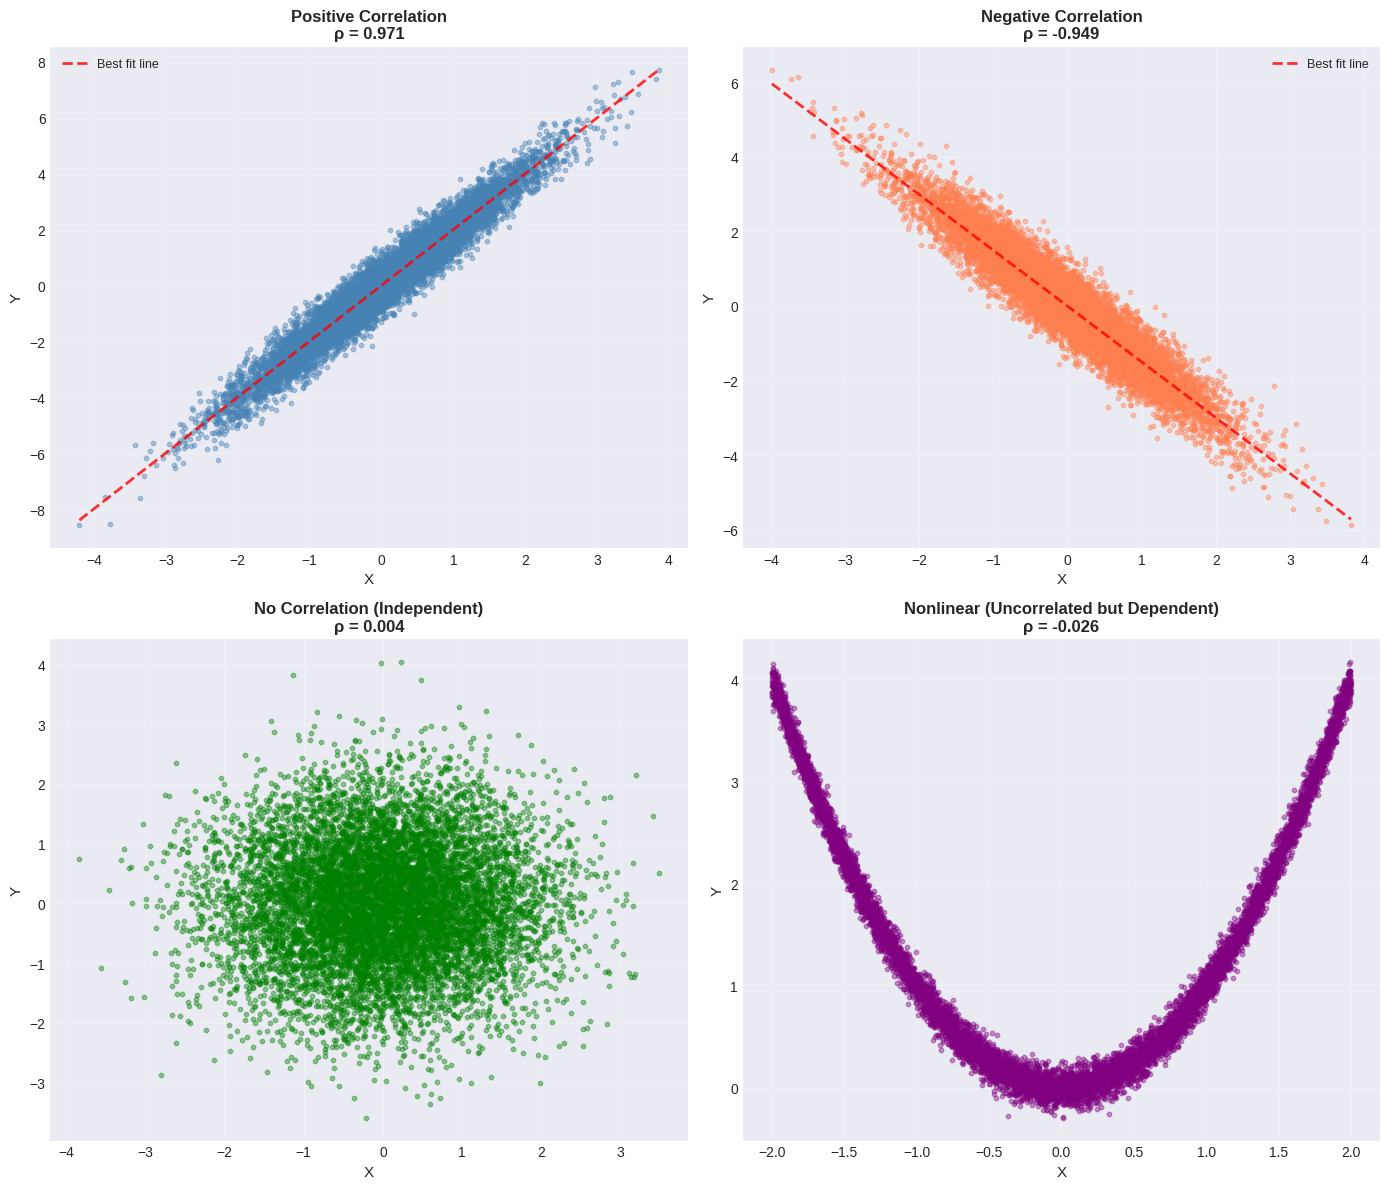

In [11]:
# Visualize different correlations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

datasets = [
    (X1, Y1, corr_1, "Positive Correlation", "steelblue"),
    (X2, Y2, corr_2, "Negative Correlation", "coral"),
    (X3, Y3, corr_3, "No Correlation (Independent)", "green"),
    (X4, Y4, corr_4, "Nonlinear (Uncorrelated but Dependent)", "purple")
]

for ax, (X, Y, corr, title, color) in zip(axes.flatten(), datasets):
    # Scatter plot
    ax.scatter(X, Y, alpha=0.4, s=10, c=color)
    
    # Add best fit line for linear relationships
    if abs(corr) > 0.1:  # Only if some correlation
        z = np.polyfit(X, Y, 1)
        p = np.poly1d(z)
        x_line = np.linspace(X.min(), X.max(), 100)
        ax.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8, label='Best fit line')
    
    ax.set_xlabel('X', fontsize=11)
    ax.set_ylabel('Y', fontsize=11)
    ax.set_title(f'{title}\nρ = {corr:.3f}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    if abs(corr) > 0.1:
        ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

Correlation Matrix:
          Var1      Var2      Var3      Var4      Var5
Var1  1.000000  0.837327 -0.639363 -0.013321  0.311326
Var2  0.837327  1.000000 -0.539692 -0.041376  0.468265
Var3 -0.639363 -0.539692  1.000000  0.025346  0.074433
Var4 -0.013321 -0.041376  0.025346  1.000000 -0.004039
Var5  0.311326  0.468265  0.074433 -0.004039  1.000000


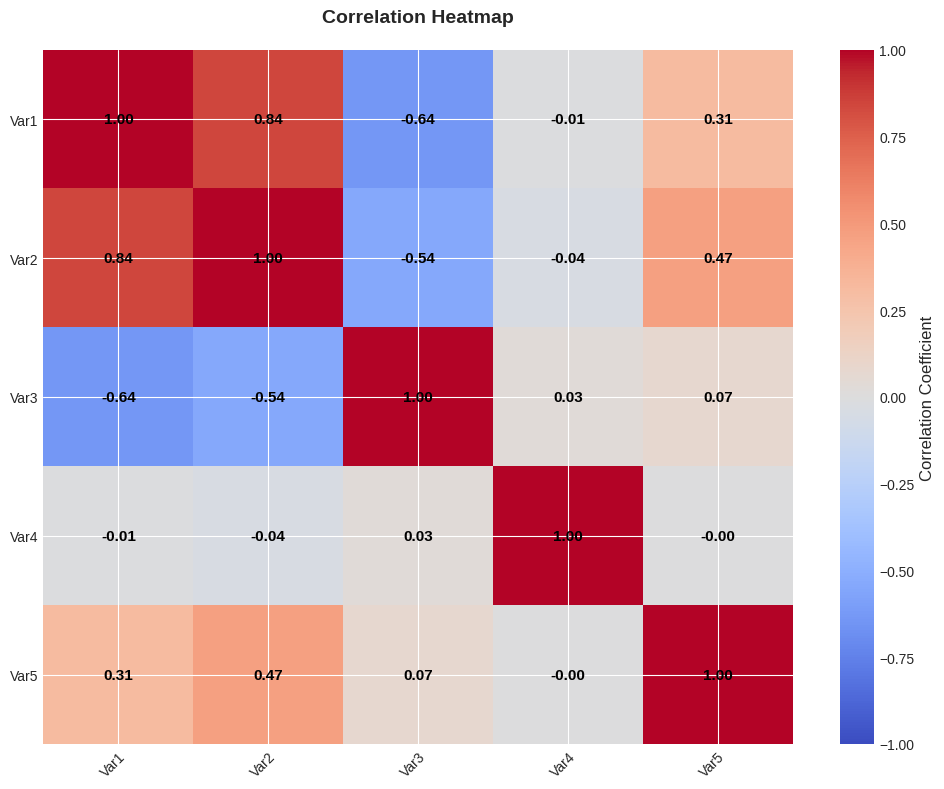

In [12]:
# Generate correlation heatmap for multiple variables
np.random.seed(42)
n = 1000

# Create correlated variables
var1 = np.random.normal(0, 1, n)
var2 = 0.8 * var1 + np.random.normal(0, 0.5, n)
var3 = -0.6 * var1 + np.random.normal(0, 0.7, n)
var4 = np.random.normal(0, 1, n)  # Independent
var5 = 0.5 * var2 + 0.3 * var3 + np.random.normal(0, 0.5, n)

# Create dataframe
data = pd.DataFrame({
    'Var1': var1,
    'Var2': var2,
    'Var3': var3,
    'Var4': var4,
    'Var5': var5
})

# Compute correlation matrix
corr_matrix = data.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', fontsize=12)

# Set ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Rotate the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add correlation values as text
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=11, fontweight='bold')

ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Moments and Moment Generating Functions <a name="moments"></a>

### Moments

The **$n$-th moment** of a random variable about the origin is:

$$E[X^n]$$

The **$n$-th central moment** (about the mean) is:

$$E[(X - \mu)^n]$$

### Common Moments

- **1st moment**: $E[X]$ — mean (center)
- **2nd central moment**: $E[(X-\mu)^2]$ — variance (spread)
- **3rd central moment**: $E[(X-\mu)^3]$ — skewness (asymmetry)
- **4th central moment**: $E[(X-\mu)^4]$ — kurtosis (tail heaviness)

### Skewness

$$\text{Skewness} = \frac{E[(X-\mu)^3]}{\sigma^3}$$

- Skewness = 0: Symmetric distribution
- Skewness > 0: Right-skewed (long right tail)
- Skewness < 0: Left-skewed (long left tail)

### Kurtosis

$$\text{Kurtosis} = \frac{E[(X-\mu)^4]}{\sigma^4}$$

- Measures tail heaviness
- Normal distribution has kurtosis = 3
- **Excess kurtosis** = Kurtosis - 3

### Moment Generating Function (MGF)

$$M_X(t) = E[e^{tX}]$$

The MGF uniquely determines the distribution and can be used to find all moments:

$$E[X^n] = M_X^{(n)}(0) = \frac{d^n M_X}{dt^n}\Big|_{t=0}$$

In [13]:
# Calculate moments for different distributions
print("="*70)
print("MOMENTS OF DISTRIBUTIONS")
print("="*70)

from scipy.stats import skew, kurtosis

n_samples = 100000

distributions = [
    ("Normal N(0,1)", np.random.normal(0, 1, n_samples)),
    ("Exponential (λ=1)", np.random.exponential(1, n_samples)),
    ("Uniform U(0,1)", np.random.uniform(0, 1, n_samples)),
    ("Chi-squared (df=3)", np.random.chisquare(3, n_samples))
]

print("\nDistribution      | Mean   | Variance | Skewness | Kurtosis | Excess Kurt")
print("-" * 80)

for name, data in distributions:
    mean = np.mean(data)
    variance = np.var(data)
    skewness = skew(data)
    kurt = kurtosis(data, fisher=False)  # Pearson's kurtosis
    excess_kurt = kurtosis(data, fisher=True)  # Excess kurtosis
    
    print(f"{name:17} | {mean:6.3f} | {variance:8.3f} | {skewness:8.3f} | {kurt:8.3f} | {excess_kurt:11.3f}")

# Calculate raw moments manually
print("\n" + "="*70)
print("RAW MOMENTS (for Normal distribution)")
print("="*70)

normal_data = np.random.normal(0, 1, n_samples)

for n in range(1, 5):
    moment = np.mean(normal_data**n)
    print(f"E[X^{n}] = {moment:.6f}")

# Calculate central moments manually
print("\n" + "="*70)
print("CENTRAL MOMENTS (for Normal distribution)")
print("="*70)

mean = np.mean(normal_data)

for n in range(1, 5):
    central_moment = np.mean((normal_data - mean)**n)
    print(f"E[(X-μ)^{n}] = {central_moment:.6f}")

MOMENTS OF DISTRIBUTIONS

Distribution      | Mean   | Variance | Skewness | Kurtosis | Excess Kurt
--------------------------------------------------------------------------------
Normal N(0,1)     |  0.001 |    1.002 |   -0.003 |    2.987 |      -0.013
Exponential (λ=1) |  1.006 |    1.013 |    2.003 |    9.009 |       6.009
Uniform U(0,1)    |  0.500 |    0.083 |    0.001 |    1.801 |      -1.199
Chi-squared (df=3) |  3.008 |    6.045 |    1.628 |    6.945 |       3.945

RAW MOMENTS (for Normal distribution)
E[X^1] = -0.004706
E[X^2] = 1.001086
E[X^3] = -0.008052
E[X^4] = 2.998590

CENTRAL MOMENTS (for Normal distribution)
E[(X-μ)^1] = -0.000000
E[(X-μ)^2] = 1.001063
E[(X-μ)^3] = 0.006082
E[(X-μ)^4] = 2.998571


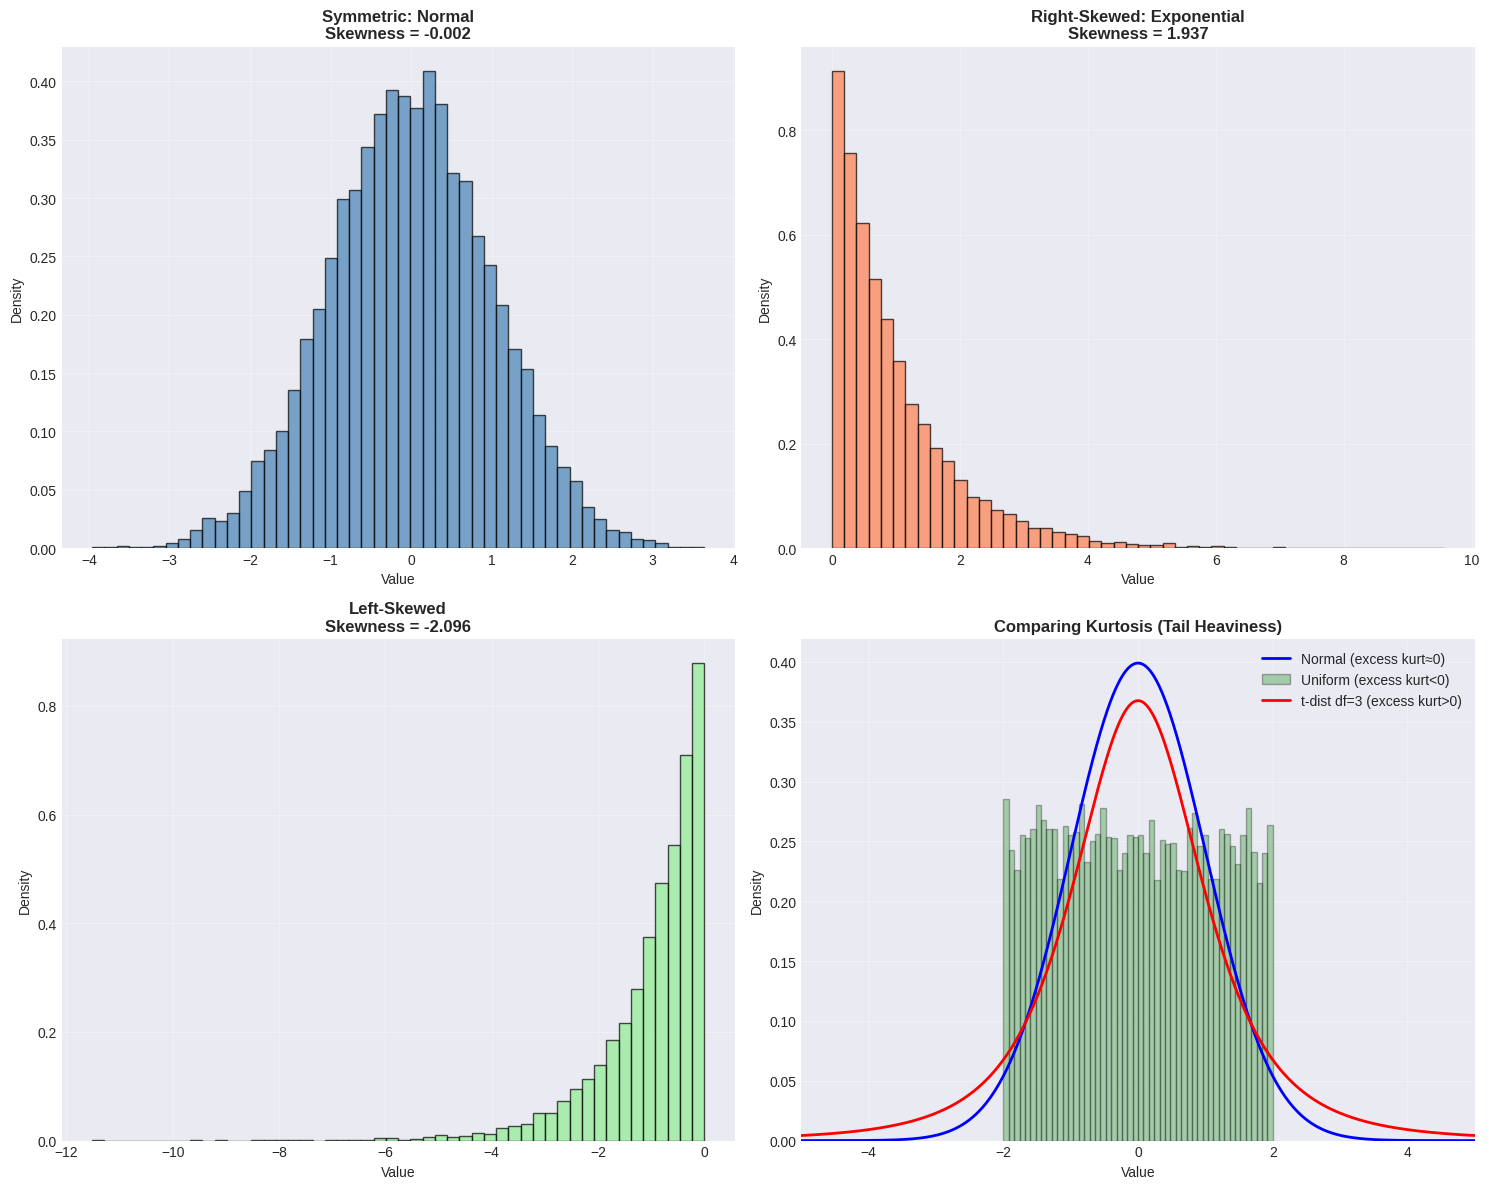

In [14]:
# Visualize skewness and kurtosis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Symmetric (Normal)
ax = axes[0, 0]
data_normal = np.random.normal(0, 1, 10000)
ax.hist(data_normal, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
ax.set_title(f'Symmetric: Normal\nSkewness = {skew(data_normal):.3f}', 
            fontsize=12, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.grid(True, alpha=0.3)

# Right-skewed (Exponential)
ax = axes[0, 1]
data_exp = np.random.exponential(1, 10000)
ax.hist(data_exp, bins=50, density=True, alpha=0.7, color='coral', edgecolor='black')
ax.set_title(f'Right-Skewed: Exponential\nSkewness = {skew(data_exp):.3f}', 
            fontsize=12, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.grid(True, alpha=0.3)

# Left-skewed
ax = axes[1, 0]
data_left = -np.random.exponential(1, 10000)
ax.hist(data_left, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
ax.set_title(f'Left-Skewed\nSkewness = {skew(data_left):.3f}', 
            fontsize=12, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.grid(True, alpha=0.3)

# Comparing kurtosis
ax = axes[1, 1]

# Normal (mesokurtic)
x = np.linspace(-5, 5, 1000)
normal_pdf = stats.norm.pdf(x, 0, 1)
ax.plot(x, normal_pdf, linewidth=2, label=f'Normal (excess kurt≈0)', color='blue')

# Uniform (platykurtic - light tails)
uniform_data = np.random.uniform(-2, 2, 10000)
ax.hist(uniform_data, bins=50, density=True, alpha=0.3, color='green', edgecolor='black',
       label=f'Uniform (excess kurt<0)')

# t-distribution (leptokurtic - heavy tails)
t_pdf = stats.t.pdf(x, df=3)
ax.plot(x, t_pdf, linewidth=2, label=f't-dist df=3 (excess kurt>0)', color='red')

ax.set_title('Comparing Kurtosis (Tail Heaviness)', fontsize=12, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(-5, 5)

plt.tight_layout()
plt.show()

## 8. Conditional Expectation <a name="conditional-expectation"></a>

### Definition

The **conditional expectation** of $X$ given $Y$ is:

$$E[X|Y=y] = \sum_x x \cdot P(X=x|Y=y) \quad \text{or} \quad \int x \cdot f_{X|Y}(x|y) dx$$

### Law of Total Expectation (Tower Property)

$$E[X] = E[E[X|Y]]$$

The expected value can be found by:
1. Finding $E[X|Y]$ for each value of $Y$
2. Taking the expectation over $Y$

### Conditional Variance

$$\text{Var}(X|Y) = E[X^2|Y] - (E[X|Y])^2$$

### Law of Total Variance

$$\text{Var}(X) = E[\text{Var}(X|Y)] + \text{Var}(E[X|Y])$$

**Interpretation**: Total variance = Average conditional variance + Variance of conditional means

In [15]:
# Conditional expectation example
print("="*70)
print("CONDITIONAL EXPECTATION")
print("="*70)

# Example: Roll two dice, let X = sum, Y = first die
n_samples = 100000
first_die = np.random.randint(1, 7, n_samples)
second_die = np.random.randint(1, 7, n_samples)
sum_dice = first_die + second_die

# Overall expectation
E_sum = np.mean(sum_dice)
print(f"\nLet X = sum of two dice, Y = first die")
print(f"\nE[X] (overall) = {E_sum:.4f}")

# Conditional expectations E[X|Y=y] for each y
print("\n" + "-"*70)
print("Conditional Expectations:")
print("-"*70)
print("Y (First Die) | E[X|Y=y] (Conditional) | Count")
print("-"*70)

conditional_means = []
for y in range(1, 7):
    mask = (first_die == y)
    conditional_sum = sum_dice[mask]
    E_X_given_Y = np.mean(conditional_sum)
    conditional_means.append(E_X_given_Y)
    print(f"     {y}        |        {E_X_given_Y:.4f}          | {np.sum(mask):6d}")

# Verify law of total expectation: E[X] = E[E[X|Y]]
print("\n" + "-"*70)
print("Law of Total Expectation: E[X] = E[E[X|Y]]")
print("-"*70)

# E[E[X|Y]] = sum over y of E[X|Y=y] * P(Y=y)
E_of_conditional_E = sum([conditional_means[i] * (1/6) for i in range(6)])

print(f"E[X] (direct) = {E_sum:.4f}")
print(f"E[E[X|Y]] = Σ E[X|Y=y]·P(Y=y) = {E_of_conditional_E:.4f}")
print(f"Difference: {abs(E_sum - E_of_conditional_E):.6f} ✓")

# Theoretical verification
print("\n" + "-"*70)
print("Theoretical Calculation:")
print("-"*70)
print("E[X|Y=y] = y + E[second die] = y + 3.5")
for y in range(1, 7):
    theoretical = y + 3.5
    print(f"E[X|Y={y}] = {y} + 3.5 = {theoretical:.1f}")

CONDITIONAL EXPECTATION

Let X = sum of two dice, Y = first die

E[X] (overall) = 6.9977

----------------------------------------------------------------------
Conditional Expectations:
----------------------------------------------------------------------
Y (First Die) | E[X|Y=y] (Conditional) | Count
----------------------------------------------------------------------
     1        |        4.5045          |  16642
     2        |        5.4856          |  16785
     3        |        6.5050          |  16641
     4        |        7.4969          |  16718
     5        |        8.4971          |  16521
     6        |        9.5112          |  16693

----------------------------------------------------------------------
Law of Total Expectation: E[X] = E[E[X|Y]]
----------------------------------------------------------------------
E[X] (direct) = 6.9977
E[E[X|Y]] = Σ E[X|Y=y]·P(Y=y) = 7.0000
Difference: 0.002314 ✓

----------------------------------------------------------------

In [16]:
# Law of Total Variance example
print("="*70)
print("LAW OF TOTAL VARIANCE")
print("="*70)

# Generate data: X depends on Y
n_samples = 100000
Y = np.random.choice([1, 2, 3], size=n_samples, p=[0.3, 0.5, 0.2])

# X|Y=1 ~ N(0, 1), X|Y=2 ~ N(5, 2), X|Y=3 ~ N(10, 1.5)
X = np.zeros(n_samples)
X[Y==1] = np.random.normal(0, 1, np.sum(Y==1))
X[Y==2] = np.random.normal(5, 2, np.sum(Y==2))
X[Y==3] = np.random.normal(10, 1.5, np.sum(Y==3))

# Total variance of X
total_var = np.var(X)

print(f"\nVar(X) (total) = {total_var:.4f}")

# Calculate E[Var(X|Y)]
conditional_vars = []
conditional_means = []
probs = [0.3, 0.5, 0.2]

print("\n" + "-"*70)
print("Conditional Statistics:")
print("-"*70)
print("Y | P(Y=y) | E[X|Y=y] | Var(X|Y=y)")
print("-"*70)

for y, p in zip([1, 2, 3], probs):
    mask = (Y == y)
    cond_var = np.var(X[mask])
    cond_mean = np.mean(X[mask])
    conditional_vars.append(cond_var)
    conditional_means.append(cond_mean)
    print(f"{y} |  {p:.1f}   |  {cond_mean:7.4f}  |  {cond_var:10.4f}")

# E[Var(X|Y)]
E_var_X_given_Y = sum([var * p for var, p in zip(conditional_vars, probs)])

# Var(E[X|Y])
E_of_E_X_given_Y = sum([mean * p for mean, p in zip(conditional_means, probs)])
var_of_E_X_given_Y = sum([p * (mean - E_of_E_X_given_Y)**2 
                         for mean, p in zip(conditional_means, probs)])

print("\n" + "-"*70)
print("Law of Total Variance: Var(X) = E[Var(X|Y)] + Var(E[X|Y])")
print("-"*70)
print(f"\nVar(X) (direct calculation) = {total_var:.4f}")
print(f"\nE[Var(X|Y)] (average conditional variance) = {E_var_X_given_Y:.4f}")
print(f"Var(E[X|Y]) (variance of conditional means) = {var_of_E_X_given_Y:.4f}")
print(f"\nSum = {E_var_X_given_Y:.4f} + {var_of_E_X_given_Y:.4f} = {E_var_X_given_Y + var_of_E_X_given_Y:.4f}")
print(f"Difference from total: {abs(total_var - (E_var_X_given_Y + var_of_E_X_given_Y)):.6f} ✓")

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print(f"Total variance ({total_var:.4f}) comes from:")
print(f"  1. Variability within each group: {E_var_X_given_Y:.4f} ({E_var_X_given_Y/total_var*100:.1f}%)")
print(f"  2. Variability between groups: {var_of_E_X_given_Y:.4f} ({var_of_E_X_given_Y/total_var*100:.1f}%)")

LAW OF TOTAL VARIANCE

Var(X) (total) = 14.9615

----------------------------------------------------------------------
Conditional Statistics:
----------------------------------------------------------------------
Y | P(Y=y) | E[X|Y=y] | Var(X|Y=y)
----------------------------------------------------------------------
1 |  0.3   |  -0.0057  |      1.0118
2 |  0.5   |   4.9867  |      3.9838
3 |  0.2   |   9.9992  |      2.2599

----------------------------------------------------------------------
Law of Total Variance: Var(X) = E[Var(X|Y)] + Var(E[X|Y])
----------------------------------------------------------------------

Var(X) (direct calculation) = 14.9615

E[Var(X|Y)] (average conditional variance) = 2.7474
Var(E[X|Y]) (variance of conditional means) = 12.2571

Sum = 2.7474 + 12.2571 = 15.0046
Difference from total: 0.043049 ✓

INTERPRETATION:
Total variance (14.9615) comes from:
  1. Variability within each group: 2.7474 (18.4%)
  2. Variability between groups: 12.2571 (81.9%)

## 9. Law of Large Numbers <a name="lln"></a>

### Weak Law of Large Numbers (WLLN)

For i.i.d. random variables $X_1, X_2, ..., X_n$ with mean $\mu$ and finite variance:

$$\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i \xrightarrow{P} \mu \text{ as } n \to \infty$$

**Meaning**: The sample average converges in probability to the true mean.

### Strong Law of Large Numbers (SLLN)

$$P\left(\lim_{n\to\infty} \bar{X}_n = \mu\right) = 1$$

**Meaning**: The sample average converges almost surely to the true mean.

### Practical Importance

1. **Justifies simulation**: We can estimate expectations by averaging samples
2. **Foundation of statistics**: Sample means are good estimators
3. **Real-world interpretation**: Long-run averages stabilize

In [17]:
# Demonstrate Law of Large Numbers
print("="*70)
print("LAW OF LARGE NUMBERS")
print("="*70)

# Simulation parameters
true_mean = 3.5  # Die roll
max_samples = 10000

# Generate die rolls
rolls = np.random.randint(1, 7, max_samples)

# Calculate running average
running_average = np.cumsum(rolls) / np.arange(1, max_samples + 1)

# Show convergence at specific points
checkpoints = [10, 50, 100, 500, 1000, 5000, 10000]

print("\nConvergence of Sample Average to True Mean:")
print("-"*70)
print("Sample Size | Sample Average | Error from True Mean")
print("-"*70)

for n in checkpoints:
    avg = running_average[n-1]
    error = abs(avg - true_mean)
    print(f"{n:11,} | {avg:14.6f} | {error:20.6f}")

print(f"\nTrue mean: {true_mean}")
print(f"Final average (n=10,000): {running_average[-1]:.6f}")

LAW OF LARGE NUMBERS

Convergence of Sample Average to True Mean:
----------------------------------------------------------------------
Sample Size | Sample Average | Error from True Mean
----------------------------------------------------------------------
         10 |       4.000000 |             0.500000
         50 |       3.520000 |             0.020000
        100 |       3.570000 |             0.070000
        500 |       3.562000 |             0.062000
      1,000 |       3.536000 |             0.036000
      5,000 |       3.526400 |             0.026400
     10,000 |       3.507900 |             0.007900

True mean: 3.5
Final average (n=10,000): 3.507900


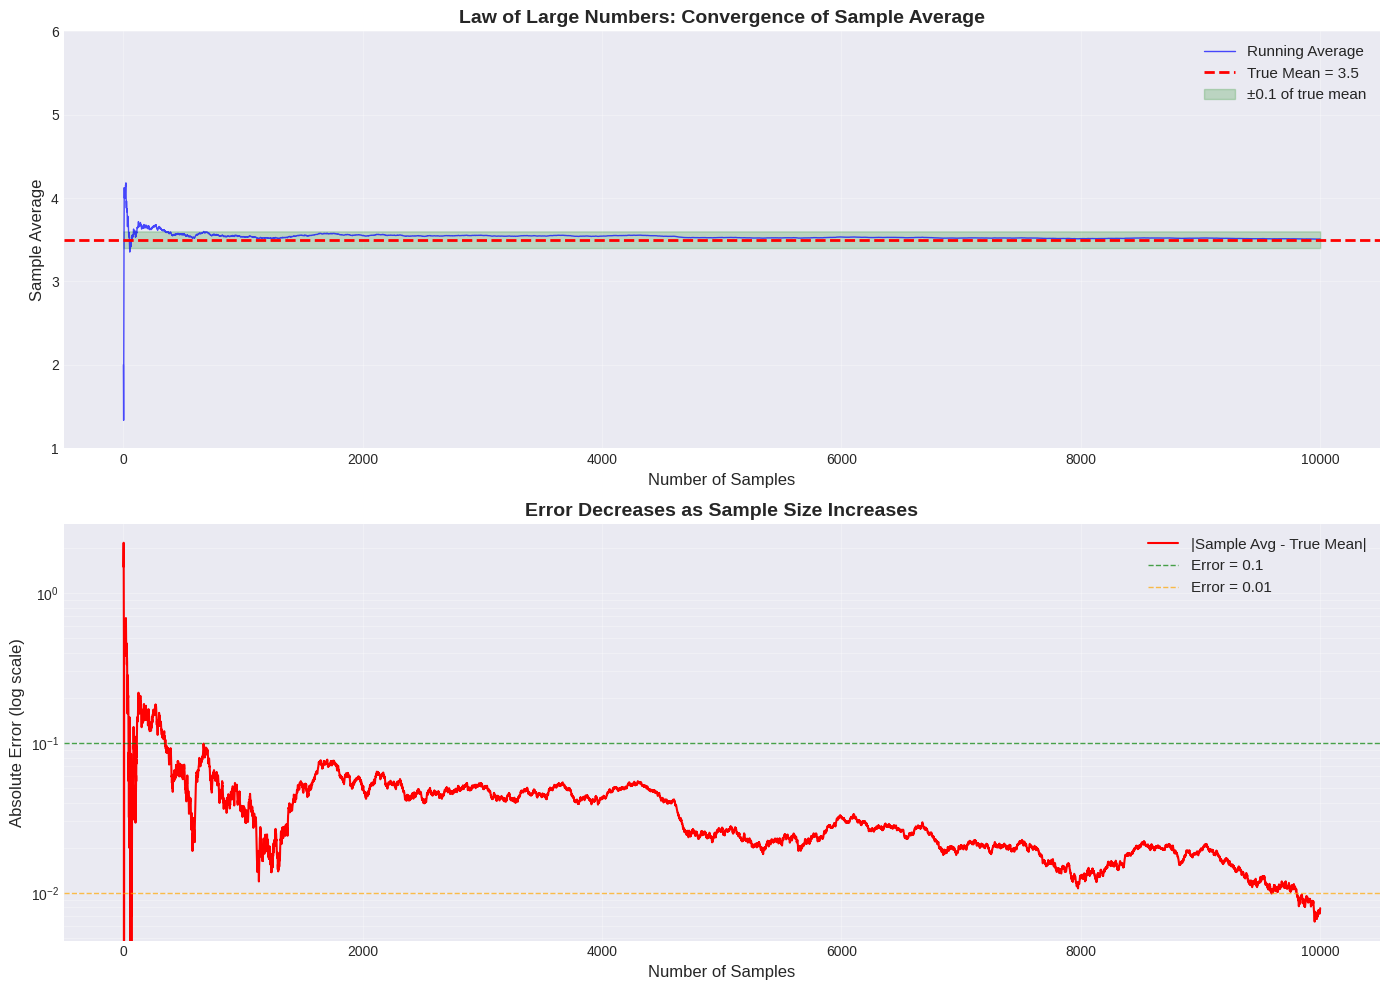

In [18]:
# Visualize Law of Large Numbers
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Running average convergence
ax = axes[0]
n_values = np.arange(1, max_samples + 1)
ax.plot(n_values, running_average, 'b-', linewidth=1, alpha=0.7, label='Running Average')
ax.axhline(true_mean, color='r', linestyle='--', linewidth=2, label=f'True Mean = {true_mean}')
ax.fill_between(n_values, true_mean - 0.1, true_mean + 0.1, 
                alpha=0.2, color='green', label='±0.1 of true mean')

ax.set_xlabel('Number of Samples', fontsize=12)
ax.set_ylabel('Sample Average', fontsize=12)
ax.set_title('Law of Large Numbers: Convergence of Sample Average', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim(1, 6)

# Error from true mean (log scale)
ax = axes[1]
errors = np.abs(running_average - true_mean)
ax.semilogy(n_values, errors, 'r-', linewidth=1.5, label='|Sample Avg - True Mean|')
ax.axhline(0.1, color='green', linestyle='--', linewidth=1, alpha=0.7, label='Error = 0.1')
ax.axhline(0.01, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='Error = 0.01')

ax.set_xlabel('Number of Samples', fontsize=12)
ax.set_ylabel('Absolute Error (log scale)', fontsize=12)
ax.set_title('Error Decreases as Sample Size Increases', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

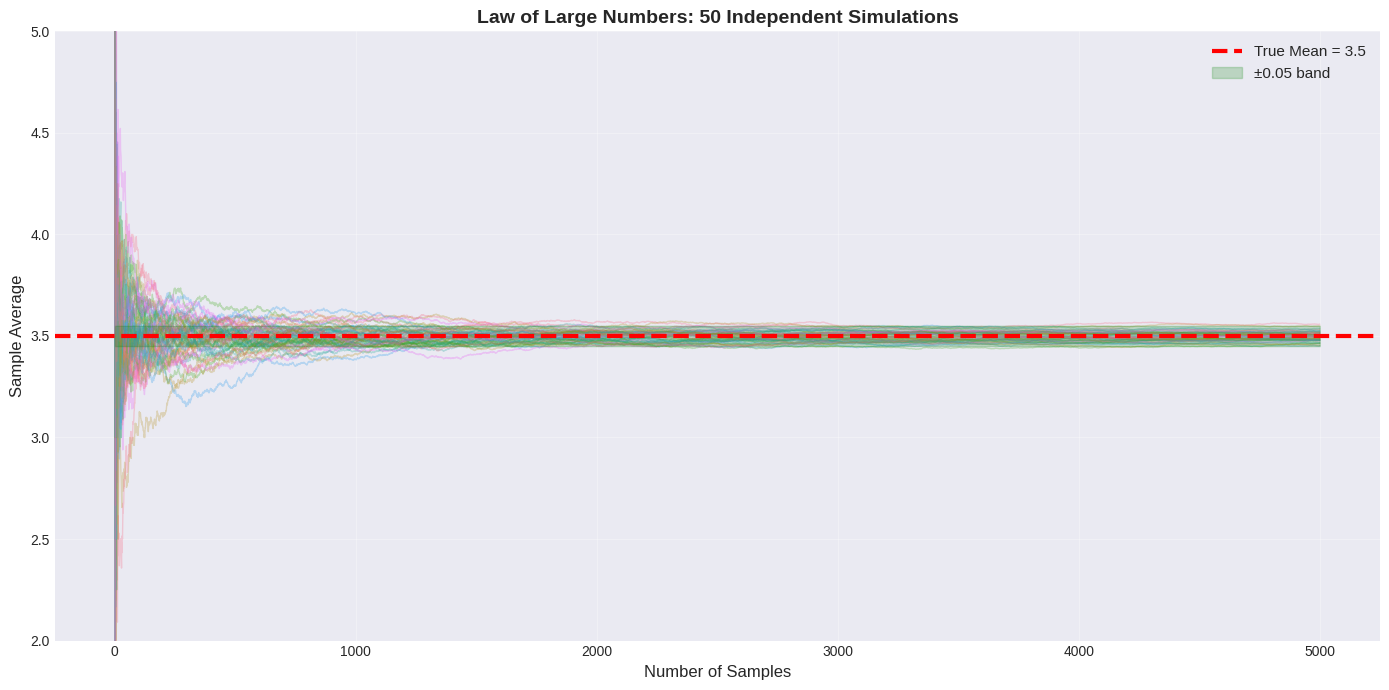


All 50 simulations converge to the true mean 3.5!
This demonstrates the Law of Large Numbers.


In [19]:
# Multiple simulations to show consistency
n_simulations = 50
max_n = 5000

fig, ax = plt.subplots(figsize=(14, 7))

for sim in range(n_simulations):
    rolls = np.random.randint(1, 7, max_n)
    running_avg = np.cumsum(rolls) / np.arange(1, max_n + 1)
    ax.plot(range(1, max_n + 1), running_avg, alpha=0.3, linewidth=1)

ax.axhline(true_mean, color='red', linestyle='--', linewidth=3, 
          label=f'True Mean = {true_mean}', zorder=100)
ax.fill_between(range(1, max_n + 1), true_mean - 0.05, true_mean + 0.05, 
               alpha=0.2, color='green', label='±0.05 band', zorder=50)

ax.set_xlabel('Number of Samples', fontsize=12)
ax.set_ylabel('Sample Average', fontsize=12)
ax.set_title(f'Law of Large Numbers: {n_simulations} Independent Simulations', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim(2, 5)

plt.tight_layout()
plt.show()

print(f"\nAll {n_simulations} simulations converge to the true mean {true_mean}!")
print("This demonstrates the Law of Large Numbers.")

## Summary and Key Takeaways

### Expected Value
- **Definition**: Long-run average, $E[X] = \sum x P(X=x)$ or $\int x f(x)dx$
- **Properties**: Linear, additive, $E[aX+b] = aE[X]+b$
- **LOTUS**: $E[g(X)]$ can be computed without finding distribution of $g(X)$

### Variance
- **Definition**: Spread measure, $\text{Var}(X) = E[(X-\mu)^2] = E[X^2] - (E[X])^2$
- **Properties**: $\text{Var}(aX+b) = a^2\text{Var}(X)$, not linear!
- **Standard Deviation**: $\sigma = \sqrt{\text{Var}(X)}$, same units as $X$

### Covariance and Correlation
- **Covariance**: $\text{Cov}(X,Y) = E[XY] - E[X]E[Y]$
- **Correlation**: $\rho = \text{Cov}(X,Y)/(\sigma_X \sigma_Y)$, ranges from -1 to 1
- **Key Insight**: Uncorrelated ≠ Independent (but independent → uncorrelated)

### Higher Moments
- **Skewness**: Measures asymmetry
- **Kurtosis**: Measures tail heaviness
- **MGF**: Uniquely determines distribution, generates all moments

### Important Theorems
1. **Law of Total Expectation**: $E[X] = E[E[X|Y]]$
2. **Law of Total Variance**: $\text{Var}(X) = E[\text{Var}(X|Y)] + \text{Var}(E[X|Y])$
3. **Law of Large Numbers**: Sample average → True mean as $n \to \infty$
4. **Chebyshev's Inequality**: $P(|X-\mu| \geq k\sigma) \leq 1/k^2$
5. **Jensen's Inequality**: For convex $g$: $E[g(X)] \geq g(E[X])$

### Practical Applications
- **Statistics**: Parameter estimation, hypothesis testing
- **Machine Learning**: Loss functions, optimization
- **Finance**: Portfolio theory, risk management
- **Engineering**: Signal processing, quality control
- **Decision Making**: Expected utility, game theory

---

## Further Reading
- Casella & Berger: "Statistical Inference"
- Wasserman: "All of Statistics"
- Bertsekas & Tsitsiklis: "Introduction to Probability"
- Khan Academy: Statistics and Probability course